## 시계열 데이터
- 목적
1. 미래값 예측(ex. 향후 일주일간 주가 예측)

2. 시계열 데이터 특성 파악(ex. 경향, 주기, 계절성, 불규칙성, 정상성 등)

- 정상성 : 시계열의 수준과 분산에 변화가 없고 주기적 변동이 없다는 것으로 미래는 확률적으로 과거와 동일하다는 것을 의미

- 정상성을 만족하는 시계열은 세가지 조건을 만족해야 한다.
1. 평균값은 시간에 관계없이 일정하다.
![image.png](attachment:image.png)-
2. 분산값은 시간에 관계없이 일정하다.
![image-2.png](attachment:image-2.png)
3. 공분산은 시간에 의존하지 않고 오직 시차에만 의존한다.

- 비정상 시계열을 정상 시계열로 전환하기 위해서는 다음과 같은 방법을 사용한다.
1. 평균이 비일정할시 차분(현시점에서 전 시점의 값을 뻄)한다.

2. 계절성을 갖는 비정상시계열은 계절차분을 사용한다.

3. 분산이 일정하지 않는 경우 변환(자연로그)를 취한다.

- 시계열 모형
1. 자기회귀모형(AR)
-> 자신의 과거 값을 사용하는 모형, 현재 시계열 자료의 몇 번째 전 자료까지 영향을 주는가를 구하는 것이 목적.

2. 이동평균모형(MA)
-> 최근 데이터의 평균이나 중앙치를 예측치를 사용하는 방법으로 과거치에는 동일한 가중치가 주어진다.

3. 자기회귀누적 이동 모형(ARIMA)
-> 대부분의 많은 시계열 자료가 따르는 모형으로 차분이나 변환으로 AR, MA, ARMA모형으로 정상화할 수 있다.

In [ ]:
import numpy as np
import pandas as pd
import datetime

## 시계열 데이터 분석
- 시계열이란 시간의 흐름 -> 시간의 흐름별로의 변화 파악
- 판다스에서 datetime, TimeStamp, Timedelta 등 여러가지 제공
- 정상성, 차분 등 필요한 방법이 존재
- 어떠한 경향이나 추세가 보이는 데이터를 정상시계열로 만든다.


In [ ]:
date = datetime.date(year = 2023, month = 5, day = 21)
time = datetime.time(hour = 22, minute = 7, second = 29, microsecond = 1234)

In [ ]:
date

datetime.date(2023, 5, 21)

In [ ]:
time

datetime.time(22, 7, 29, 1234)

In [ ]:
dt = datetime.datetime(year = 2023, month = 5, day = 21,hour = 22, minute = 7, second = 29, microsecond = 1234)
dt

datetime.datetime(2023, 5, 21, 22, 7, 29, 1234)

In [ ]:
td = datetime.timedelta(days = 20, hours = 22)
td

datetime.timedelta(days=20, seconds=79200)

In [ ]:
print(date+td)

2023-06-10


In [ ]:
print(dt+td)

2023-06-11 20:07:29.001234


- datetime을 이용해서 시계열 데이터로 바꿀 수 있다.
- pd.to_datetime을 이용

In [ ]:
pd.to_datetime('2023-01-03')

Timestamp('2023-01-03 00:00:00')

In [ ]:
#datetime의 장점 ->여러 형태의 날짜표현도 변환 가능
a = pd.Series(('2023-05-21','05-21-2023','2023/05/21','2023/05/21','2023/05/32'))
a

0    2023-05-21
1    05-21-2023
2    2023/05/21
3    2023/05/21
4    2023/05/32
dtype: object

In [ ]:
pd.to_datetime(a, dayfirst=True,errors = 'coerce') #error의 경우 nan값으로 반환

C:\Users\kimht\AppData\Local\Temp\ipykernel_21532\2188209761.py:1: UserWarning: Parsing '05-21-2023' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime(a, dayfirst=True,errors = 'coerce') #error의 경우 nan값으로 반환


0   2023-05-21
1   2023-05-21
2   2023-05-21
3   2023-05-21
4          NaT
dtype: datetime64[ns]

- datetime이 변환해주는 형태가 정해져 있다.
- 연도, 월, 일의 순서를 맞춰서 해야한다.
- mm-dd-yyyy
- yyyy-mm-dd
- yyyy/mm/dd
- yyyy.mm.dd
- 다양한 표현방법 존재

In [ ]:
crime = pd.read_csv('../BDA/CSV/crime.csv')
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [ ]:
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


In [ ]:
crime_dt = crime.set_index('REPORTED_DATE')
crime_dt

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [ ]:
#인덱스 추출을 통해 2017년의 자료만 확인 가능하다.
crime_dt.loc['2017']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-05-22 14:41:00,7261,traffic-accident,traffic-accident,-104.673812,39.849292,dia,0,1
2017-05-17 20:35:00,7262,threats-to-injure,public-disorder,-105.020053,39.694351,ruby-hill,1,0
2017-06-07 07:47:00,7265,burglary-residence-by-force,burglary,-104.981677,39.763597,five-points,1,0
2017-05-26 16:46:00,7270,theft-other,larceny,-104.839119,39.769694,stapleton,1,0
2017-06-07 07:42:00,7272,criminal-trespassing,all-other-crimes,-104.673812,39.849292,dia,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [ ]:
crime_dt.loc['2017-09']#원하는 연도-월의 자료만 추출 가능하다.

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-09-17 02:13:00,89011,aggravated-assault,aggravated-assault,-104.990480,39.728076,lincoln-park,1,0
2017-09-18 13:30:00,112711,criminal-mischief-mtr-veh,public-disorder,-104.989896,39.753590,five-points,1,0
2017-09-12 15:59:00,134270,traffic-accident,traffic-accident,-104.940906,39.742085,city-park,0,1
2017-09-26 21:17:00,191519,traf-other,all-other-crimes,-105.008656,39.711201,athmar-park,1,0
2017-09-10 11:30:00,193934,aggravated-assault,aggravated-assault,-105.049447,39.700059,westwood,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [ ]:
crime_dt.loc['Feb 2015'] #영어로도 추출 가능

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2015-02-05 18:16:00,1275,burglary-residence-no-force,burglary,-104.890099,39.712307,lowry-field,1,0
2015-02-04 07:55:00,1286,traffic-accident,traffic-accident,-104.801631,39.772829,gateway-green-valley-ranch,0,1
2015-02-17 03:32:00,1364,traf-habitual-offender,all-other-crimes,-104.940511,39.684143,virginia-village,1,0
2015-02-18 15:00:00,1408,traffic-accident,traffic-accident,-104.998902,39.711204,baker,0,1
2015-02-06 11:30:00,1449,harassment-dv,public-disorder,-104.930577,39.763330,northeast-park-hill,1,0
...,...,...,...,...,...,...,...,...
2015-02-10 13:20:00,415576,sex-aslt-non-rape,sexual-assault,NaN,NaN,harvey-park,1,0
2015-02-27 08:35:00,419306,theft-unauth-use-of-ftd,white-collar-crime,-104.912296,39.628069,southmoor-park,1,0
2015-02-05 00:01:00,425170,forgery-other,white-collar-crime,-104.838374,39.784212,montbello,1,0


## Between_time
- 원하는 시간대 사이의 자료 추출

In [ ]:
crime_17 = crime_dt.loc['2017'].sort_index()

In [ ]:
crime_17.between_time('13:00','13:59') #13시부터 13:59에 존재하는 데이터만 추출

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-01-01 13:05:00,374795,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.922584,39.658808,university-hills,1,0
2017-01-01 13:17:00,371396,traffic-accident-hit-and-run,traffic-accident,-104.973832,39.739159,capitol-hill,0,1
2017-01-01 13:22:00,345908,theft-other,larceny,-104.836645,39.780751,montbello,1,0
2017-01-01 13:35:00,375421,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.917888,39.749742,south-park-hill,1,0
2017-01-01 13:44:00,376618,traffic-accident,traffic-accident,-104.940708,39.711562,belcaro,0,1
...,...,...,...,...,...,...,...,...
2017-09-28 13:31:00,455027,traffic-accident,traffic-accident,-104.912791,39.733649,montclair,0,1
2017-09-28 13:31:00,455032,theft-of-motor-vehicle,auto-theft,-104.995573,39.733789,lincoln-park,1,0
2017-09-28 13:33:00,454293,theft-shoplift,larceny,-104.939969,39.690612,virginia-village,1,0


## at_time
- 해당 정각 시간에 대한 데티어 추출

In [ ]:
crime_17.at_time('17:00')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-01-09 17:00:00,369948,theft-parts-from-vehicle,theft-from-motor-vehicle,-105.065787,39.651946,bear-valley,1,0
2017-01-10 17:00:00,361065,criminal-mischief-other,public-disorder,-104.896194,39.763719,stapleton,1,0
2017-01-11 17:00:00,353517,theft-shoplift,larceny,-104.993922,39.746143,cbd,1,0
2017-01-17 17:00:00,369159,theft-of-motor-vehicle,auto-theft,-105.000360,39.749608,union-station,1,0
2017-01-18 17:00:00,356861,traf-other,all-other-crimes,-105.003774,39.786793,chaffee-park,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 17:00:00,456326,criminal-trespassing,all-other-crimes,-104.941270,39.740060,congress-park,1,0
2017-09-15 17:00:00,452562,assault-simple,other-crimes-against-persons,-104.781434,39.785649,gateway-green-valley-ranch,1,0
2017-09-16 17:00:00,454949,drug-cocaine-possess,drug-alcohol,-104.979913,39.740021,capitol-hill,1,0


## resample

In [ ]:
crime_sp17 = crime_17[['IS_CRIME','IS_TRAFFIC']]
crime_sp = crime_17['IS_CRIME']

In [ ]:
crime_sp17.resample('W').sum() #주별 범죄 발생량 합계 추출
                               #연 : Y, 월 : M, 주 : W로 구분

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2017-01-01,178,43
2017-01-08,1110,446
2017-01-15,1217,438
2017-01-22,1290,512
2017-01-29,1308,409
2017-02-05,1311,527
2017-02-12,1312,410
2017-02-19,1346,387
2017-02-26,1205,431


In [ ]:
crime_sp17.resample('M').mean() #월별 평균 범죄 발생량 확인 가능

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2017-01-31,0.738669,0.261331
2017-02-28,0.744285,0.256008
2017-03-31,0.755727,0.244535
2017-04-30,0.748651,0.252159
2017-05-31,0.730647,0.269843
2017-06-30,0.742509,0.258113
2017-07-31,0.747169,0.253702
2017-08-31,0.755464,0.245112
2017-09-30,0.737709,0.262972


<AxesSubplot:xlabel='REPORTED_DATE'>

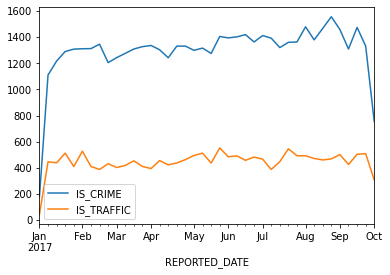

In [ ]:
crime_spw = crime_sp17.resample('W').sum()
crime_spw.plot()